In [1]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_motion = pd.read_csv('clustering_columns.csv')

In [3]:
df_motion.head()

,shiftSinceLineset,motionSinceLineset,snap_motion_gap,init_rel_y_dis,end_rel_y_dis,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool
0,0,1,24,173,-1396,1569,-182,-107,-75,337.021739,46,-1397.0,0
1,0,1,0,556,-344,900,-195,-275,80,412.727273,22,-344.0,0
2,0,1,0,1082,582,500,-151,-117,-34,242.210526,19,582.0,0
3,0,1,41,41,-1463,1504,-897,-208,-689,307.711538,52,42.0,1
4,0,1,0,929,391,538,-242,-354,112,380.466667,15,938.0,1


In [4]:
# #get dummy variables for non-numeric columns

# df_motion = pd.get_dummies(df_motion, columns=['position'], drop_first=False, dtype='int')

In [5]:
from sklearn.preprocessing import StandardScaler

#standardize the variables before conducting PCA
scaler = StandardScaler()
scaler.fit(df_motion)
df_motion_scaled = scaler.transform(df_motion)

In [6]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [7]:
pca.fit(df_motion_scaled)

PCA(n_components=4)

In [8]:
x_pca = pca.transform(df_motion_scaled)

In [9]:
df_motion_scaled.shape

(4154, 13)

In [10]:
x_pca.shape

(4154, 4)

In [11]:
# Perform PCA (already done in your code)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Variance Explained:", np.sum(explained_variance))

Explained Variance Ratio: [0.23321856 0.20697553 0.15160379 0.09462299]
Total Variance Explained: 0.6864208684426456


C:\Users\etien\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\etien\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\etien\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\etien\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\etien\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

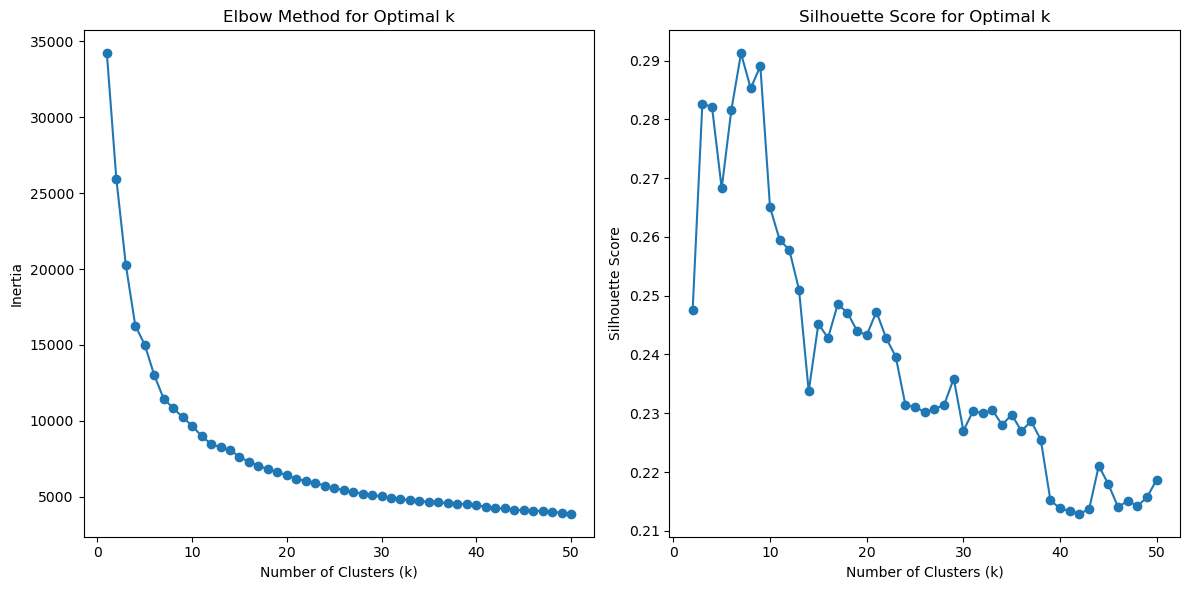

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of k values to try
k_range = range(1, 51)  # Trying k values from 1 to 10

# For storing inertia and silhouette scores
inertia = []
sil_scores = []

# Loop through each value of k
for k in k_range:
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_pca)  # Use your PCA-transformed data (x_pca)

    # Compute inertia for Elbow Method
    inertia.append(kmeans.inertia_)

    # Compute silhouette score
    if k > 1:  # Silhouette score is only defined for k > 1
        sil_score = silhouette_score(x_pca, labels)
        sil_scores.append(sil_score)
    else:
        sil_scores.append(-1)  # For k=1, silhouette score is undefined

# Plot the Elbow Method (Inertia vs. k)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot the Silhouette Scores (Silhouette Score vs. k)
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], sil_scores[1:], marker='o')  # Skip the first value (k=1)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()


In [29]:
#use n=21 based on this
kmeans = KMeans(n_clusters=21, random_state=42)  # Adjust clusters as needed
labels = kmeans.fit_predict(x_pca)

C:\Users\etien\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(


In [30]:
kmeans.labels_

array([12, 16, 11, ...,  5,  3, 16])

In [31]:
#set labels as a column in original df

In [32]:
df_player_play_motion = pd.read_csv('df_player_play_motion.csv')

In [33]:
df_player_play_motion['motion_label'] = kmeans.labels_

In [34]:
df_player_play_motion.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_flipped,motion_label
0,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1569,-182,-107,-75,337.021739,46,-1397.0,0,0,12
1,2022090800,212,47879,BUF,0,0,0,0,0,0,...,900,-195,-275,80,412.727273,22,-344.0,0,0,16
2,2022090800,236,52536,BUF,0,0,0,0,0,1,...,500,-151,-117,-34,242.210526,19,582.0,0,1,11
3,2022090800,364,44881,LA,0,0,0,0,0,1,...,1504,-897,-208,-689,307.711538,52,42.0,1,0,10
4,2022090800,438,53678,LA,0,0,0,0,0,1,...,538,-242,-354,112,380.466667,15,938.0,1,1,18


In [35]:
# Create a dictionary to hold DataFrames for each unique motion_label
motion_label_dfs = {label: df_player_play_motion[df_player_play_motion['motion_label'] == label] 
                     for label in df_player_play_motion['motion_label'].unique()}

In [36]:
# Get the row size of every DataFrame in motion_label_dfs
row_sizes = {label: df.shape[0] for label, df in motion_label_dfs.items()}
# Print the row sizes in numerical order, one per line
for label, size in sorted(row_sizes.items(), key=lambda item: item[1]):
    print(f'Motion Label: {label}, Row Size: {size}')

##CHECK THE MOTIONS WITH ONLY 2 IN THE GROUP, LIKELY OUTLIERS THAT CAN BE CUT

Motion Label: 14, Row Size: 2
Motion Label: 10, Row Size: 64
Motion Label: 9, Row Size: 93
Motion Label: 3, Row Size: 100
Motion Label: 19, Row Size: 106
Motion Label: 13, Row Size: 127
Motion Label: 20, Row Size: 130
Motion Label: 17, Row Size: 145
Motion Label: 0, Row Size: 149
Motion Label: 6, Row Size: 156
Motion Label: 15, Row Size: 157
Motion Label: 2, Row Size: 227
Motion Label: 11, Row Size: 265
Motion Label: 5, Row Size: 266
Motion Label: 12, Row Size: 269
Motion Label: 4, Row Size: 281
Motion Label: 8, Row Size: 282
Motion Label: 7, Row Size: 313
Motion Label: 1, Row Size: 326
Motion Label: 16, Row Size: 342
Motion Label: 18, Row Size: 354


In [37]:
#example
motion_label_dfs[3][:10]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_flipped,motion_label
10,2022090800,721,47857,BUF,0,0,0,0,0,0,...,544,-502,-482,-20,100.839286,56,-301.0,0,1,3
16,2022090800,1102,52494,BUF,0,0,0,0,0,1,...,-118,-454,-450,-4,81.111111,18,258.0,1,0,3
40,2022090800,2934,52494,BUF,0,0,0,0,0,1,...,426,-512,-497,-15,149.066667,30,224.0,1,0,3
47,2022091100,233,41712,ATL,0,0,0,0,0,0,...,-130,-652,-481,-171,148.416667,12,233.0,0,0,3
67,2022091100,2616,53612,ATL,0,0,0,0,0,0,...,2,-824,-803,-21,78.125000,8,20.0,0,1,3
149,2022091102,3148,47856,CHI,0,0,0,0,0,0,...,-33,-687,-745,58,81.461538,13,13.0,0,0,3
175,2022091103,2272,44927,CIN,0,0,0,0,0,0,...,220,-761,-505,-256,85.571429,28,1.0,1,1,3
179,2022091103,2433,53453,PIT,0,0,0,0,0,0,...,178,-664,-424,-240,148.750000,16,-166.0,0,1,3
229,2022091104,3204,46270,PHI,0,0,0,0,0,0,...,-13,-534,-531,-3,78.078125,64,223.0,0,1,3
247,2022091105,445,52449,IND,0,0,0,0,0,1,...,-46,-479,-529,50,203.357143,42,42.0,1,0,3


Observations on the results
- Doesn't seem to care if a player runs back and forth, for example: [2022091100, 166]
- Might be useful to add distance from QB to this (distinguish between starting in backfield, lined up outside etc.) Tried to do with line but maybe didn't work great

In [38]:
df_player_play_motion[(df_player_play_motion['gameId'] == 2022091100) & (df_player_play_motion['playId'] == 166)]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_flipped,motion_label
45,2022091100,166,48374,ATL,0,0,0,0,0,0,...,874,-154,-245,91,381.606557,61,940.0,1,1,7


In [39]:
#Export labels for every motion
df_player_play_motion.to_csv('player_play_motion_labels.csv',index=False)

#Create a short description for all categories for the reader